## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
- **age:** Age in years
- **sex:** (1 = male; 0 = female)
- **cp:** Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)
- **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)
- **cholserum:** Cholestoral in mg/dl
- **fbs** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg:** Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
- **thalach:** Maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeakST:** Depression induced by exercise relative to rest
- **slope:** The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
- **ca:** Number of major vessels (0-4) colored by flourosopy
- **thal:** 1 = normal; 2 = fixed defect; 3 = reversable defect
- **sick:** Indicates the presence of Heart disease (True = Disease; False = No disease)

`sick` is the label that you will be predicting.

## Loading Essentials and Helper Functions 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import random

%matplotlib inline

random.seed(148) 

In [2]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, y_hat, title_name="Confusion Matrix"):
    '''Draws a confusion matrix for the given target and predictions'''
    cm = metrics.confusion_matrix(y, y_hat)
    metrics.ConfusionMatrixDisplay(cm).plot()
    plt.title(title_name)

## Part 1. Load the Data and Analyze

In [3]:
df = pd.read_csv('heartdisease.csv')
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [4]:
from sklearn.utils import shuffle
df = shuffle(df, random_state = 1)

In [5]:
df["sick"] = df["sick"].astype(int)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,0
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,1
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,1
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,1


To visualize the data, histogram is plotted.

(array([  2.,   0.,   0.,  18.,   0.,   0., 166.,   0.,   0., 117.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

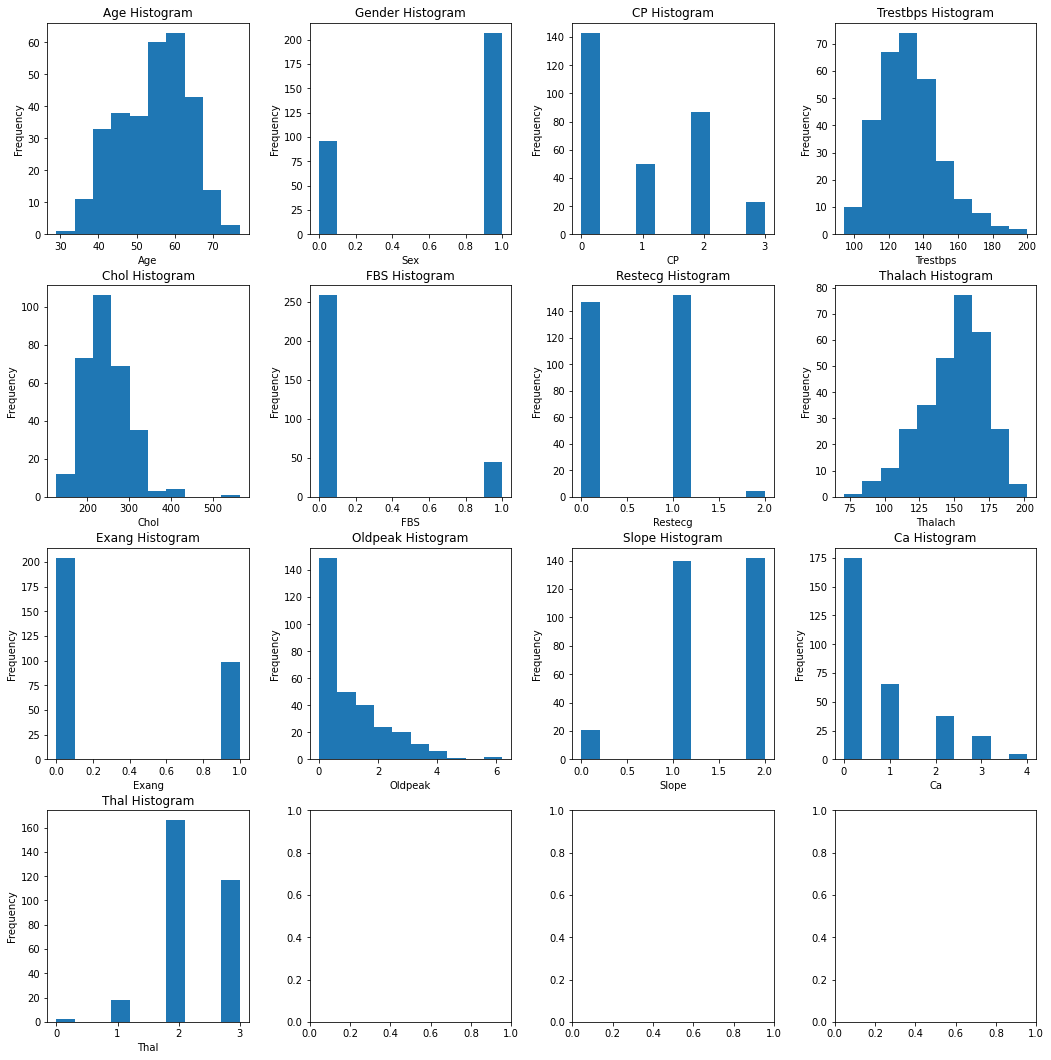

In [6]:
# Numerical - age, trestbp, cholserum, thalach, oldpeak
# Categorical - cp, restecg, slope, ca, thal
# Binary - sex, fbs, exang

fig, axs = plt.subplots(4,4,figsize=(15,15))
fig.tight_layout(pad=3.0)
axs[0,0].set_xlabel("Age")
axs[0,0].set_ylabel("Frequency")
axs[0,0].set_title("Age Histogram")
axs[0,0].hist(df.age,bins=10)

axs[0,1].set_xlabel("Sex")
axs[0,1].set_ylabel("Frequency")
axs[0,1].set_title("Gender Histogram")
axs[0,1].hist(df.sex,bins=10)

axs[0,2].set_xlabel("CP")
axs[0,2].set_ylabel("Frequency")
axs[0,2].set_title("CP Histogram")
axs[0,2].hist(df.cp,bins=10)

axs[0,3].set_xlabel("Trestbps")
axs[0,3].set_ylabel("Frequency")
axs[0,3].set_title("Trestbps Histogram")
axs[0,3].hist(df.trestbps,bins=10)

axs[1,0].set_xlabel("Chol")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_title("Chol Histogram")
axs[1,0].hist(df.chol,bins=10)

axs[1,1].set_xlabel("FBS")
axs[1,1].set_ylabel("Frequency")
axs[1,1].set_title("FBS Histogram")
axs[1,1].hist(df.fbs,bins=10)

axs[1,2].set_xlabel("Restecg")
axs[1,2].set_ylabel("Frequency")
axs[1,2].set_title("Restecg Histogram")
axs[1,2].hist(df.restecg,bins=10)


axs[1,3].set_xlabel("Thalach")
axs[1,3].set_ylabel("Frequency")
axs[1,3].set_title("Thalach Histogram")
axs[1,3].hist(df.thalach,bins=10)


axs[2,0].set_xlabel("Exang")
axs[2,0].set_ylabel("Frequency")
axs[2,0].set_title("Exang Histogram")
axs[2,0].hist(df.exang,bins=10)


axs[2,1].set_xlabel("Oldpeak")
axs[2,1].set_ylabel("Frequency")
axs[2,1].set_title("Oldpeak Histogram")
axs[2,1].hist(df.oldpeak,bins=10)


axs[2,2].set_xlabel("Slope")
axs[2,2].set_ylabel("Frequency")
axs[2,2].set_title("Slope Histogram")
axs[2,2].hist(df.slope,bins=10)

axs[2,3].set_xlabel("Ca")
axs[2,3].set_ylabel("Frequency")
axs[2,3].set_title("Ca Histogram")
axs[2,3].hist(df.ca,bins=10)

axs[3,0].set_xlabel("Thal")
axs[3,0].set_ylabel("Frequency")
axs[3,0].set_title("Thal Histogram")
axs[3,0].hist(df.thal,bins=10)

## Part 2. Data Training - Logistic Regression
### 2.1 Data Pipeline and Data Split

In [7]:
target = np.array(df.sick)
df = df.drop("sick",axis=1)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Numerical - age, trestbp, cholserum, thalach, oldpeak
# Categorical - cp, restecg, slope, ca, thal
# Binary - sex, fbs, exang

categorical_features = ["cp","restecg","slope","ca","thal"]
numerical_features = ["age","trestbps","chol","thalach","oldpeak"]

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'),categorical_features)
])


features_transformed = full_pipeline.fit_transform(df)

In [9]:
x_train_tf, x_test_tf, y_train, y_test = train_test_split(features_transformed,target,test_size =0.2, random_state = 1)

### 2.2 Implementing Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(x_train_tf, y_train)
log_reg_predicted_train = log_reg.predict(x_train_tf)
log_reg_predicted_test = log_reg.predict(x_test_tf)

**Test Data Result**
Accuracy:    0.836066
Precision:   0.960000
Recall:      0.727273
F1 Score:    0.827586
Confusion Matrix: 



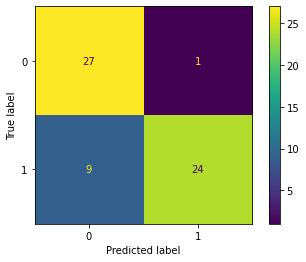

In [11]:
# Test Data
print("**Test Data Result**")
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, log_reg_predicted_test))) 
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, log_reg_predicted_test, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, log_reg_predicted_test, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, log_reg_predicted_test, labels=None, pos_label=1, average='binary', sample_weight=None)))


plot_confusion_matrix(log_reg, x_test_tf, y_test) 
print("Confusion Matrix: \n")
plt.show()